## CWRU Data Analytics  

**Unit 6 | Assignment - WeatherPy**  
  
Robert Wood  
3/23/2019

----

**Analysis**
* The max temperature significantly rises closer to the equator.  The max temperature also falls off more quickly as we move further into the northern hemisphere (vs. the southern hemisphere).
* There is no strong relationship between latitude and cloudiness.  However, there are strong bands of cloudiness at 0%, 20%, 40%, and 80% across all latitudes.  This may be due to the estimation of reported "cloudiness" being rounded to the nearest 10%.
* There is no strong correlation between latitude and wind speed. However, in the northern hemisphere, there are multiple outliers with high wind speed (>25 mph).

----


In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import datetime to display current date on plot titles
import datetime

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [64]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
# Define base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define units to be used
units = "imperial"

# Define query URL, which incorporates base URL, the API key, and units
query_url = f"{url}appid={api_key}&units={units}&q="

# Set up lists to hold reponse info
cities_final = []
lat = []
long = []
temp = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []

# Declare initial values for iterators
i = 0
j = 1

# Loop through all cities.  Check that there is a corresponding record in the database,
# then print processing note and record values into the appropriate list
for city in cities:
    if requests.get(query_url + city).status_code == requests.codes.ok:
        city_data = requests.get(query_url + city).json()
        print(f"Processing Record {i} of Set {j} | {city}")
        cities_final.append(city)
        lat.append(city_data["coord"]["lat"])
        long.append(city_data["coord"]["lon"])
        temp.append(city_data["main"]["temp"])
        cloudiness.append(city_data["clouds"]["all"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        humidity.append(city_data["main"]["humidity"])
        max_temp.append(city_data["main"]["temp_max"])
        wind_speed.append(city_data["wind"]["speed"])
        i += 1
    else:
        print("City not found. Skipping...")
    if i == 51:
        j += 1
        i = 0
        time.sleep(60)   # Pause for 60 seconds to avoid exceeding allowable API calls per minute

Processing Record 0 of Set 1 | jackson
Processing Record 1 of Set 1 | sabang
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | port elizabeth
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | westport
City not found. Skipping...
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | camopi
Processing Record 11 of Set 1 | kendari
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | visnes
Processing Record 14 of Set 1 | north augusta
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | atuona
City not found. Skipping...
City not found. Skipping...
Processing Record 17 of Set 1 | filingue
Processing Record 18 of Set 1 | gairatganj
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | faanui


Processing Record 31 of Set 4 | sobolevo
Processing Record 32 of Set 4 | ponta delgada
City not found. Skipping...
Processing Record 33 of Set 4 | kulhudhuffushi
City not found. Skipping...
Processing Record 34 of Set 4 | kirakira
Processing Record 35 of Set 4 | pangai
Processing Record 36 of Set 4 | leningradskiy
Processing Record 37 of Set 4 | teya
Processing Record 38 of Set 4 | dingle
Processing Record 39 of Set 4 | ortigueira
Processing Record 40 of Set 4 | balikpapan
Processing Record 41 of Set 4 | praia
Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | launceston
Processing Record 45 of Set 4 | albina
Processing Record 46 of Set 4 | sao gabriel da cachoeira
Processing Record 47 of Set 4 | poronaysk
Processing Record 48 of Set 4 | hay river
Processing Record 49 of Set 4 | dudinka
Processing Record 50 of Set 4 | cimahi
Processing Record 0 of Set 5 | kendal
Processing Record 1 of Set 5 | muros
Processing Rec

Processing Record 13 of Set 8 | balaguer
Processing Record 14 of Set 8 | parrita
Processing Record 15 of Set 8 | malanje
Processing Record 16 of Set 8 | lebedyn
City not found. Skipping...
City not found. Skipping...
Processing Record 17 of Set 8 | veraval
City not found. Skipping...
Processing Record 18 of Set 8 | raghogarh
Processing Record 19 of Set 8 | husavik
Processing Record 20 of Set 8 | padang
Processing Record 21 of Set 8 | jumla
Processing Record 22 of Set 8 | arman
Processing Record 23 of Set 8 | barcelos
Processing Record 24 of Set 8 | zelenets
Processing Record 25 of Set 8 | pokrovka
Processing Record 26 of Set 8 | rio verde de mato grosso
Processing Record 27 of Set 8 | pregradnoye
Processing Record 28 of Set 8 | hamilton
City not found. Skipping...
Processing Record 29 of Set 8 | fallon
Processing Record 30 of Set 8 | shingu
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | severobaykalsk
Processing Record 33 of Set 8 | poso
Processing Record 34 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
# Create DataFrame
weather_data = pd.DataFrame({"City": cities_final,
                             "Cloudiness": cloudiness,
                             "Country": country,
                             "Date": date,
                             "Humidity": humidity,
                             "Lat": lat,
                             "Long": long,
                             "Max Temp": max_temp,
                             "Wind Speed": wind_speed})

# Export DataFrame to csv
weather_data.to_csv(output_data_file)

# Display DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,jackson,75,US,1552581620,83,35.61,-88.82,73.40,19.46
1,sabang,32,PH,1552581757,98,13.72,123.58,73.81,6.29
2,punta arenas,40,CL,1552581201,71,-53.16,-70.91,55.40,12.75
3,port elizabeth,1,US,1552581752,58,39.31,-74.98,68.00,6.93
4,port lincoln,20,AU,1552581758,100,-34.72,135.86,59.19,7.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

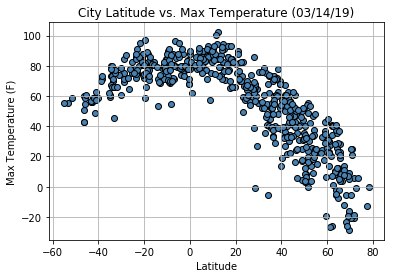

In [72]:
# Build a scatter plot for Latitude vs. Max. Temp.
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", color="steelblue", edgecolors="black")

# Determine current date
now = datetime.datetime.now()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({now.strftime('%m/%d/%y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/latitude_vs_max_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

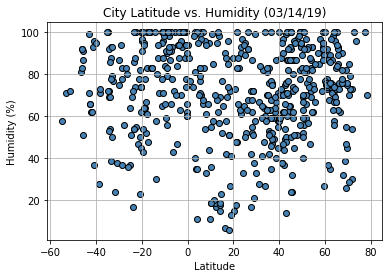

In [73]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", color="steelblue", edgecolors="black")

# Determine current date
now = datetime.datetime.now()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({now.strftime('%m/%d/%y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/latitude_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

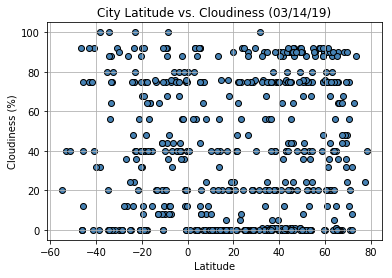

In [74]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", color="steelblue", edgecolors="black")

# Determine current date
now = datetime.datetime.now()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({now.strftime('%m/%d/%y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/latitude_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

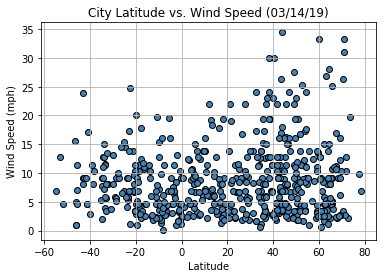

In [75]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", color="steelblue", edgecolors="black")

# Determine current date
now = datetime.datetime.now()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({now.strftime('%m/%d/%y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/latitude_vs_wind_speed.png")

# Show plot
plt.show()